In [1]:
import pandas as pd
import numpy as np
from scipy import linalg

np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches


In [2]:
#Read the input xlsx file and set OTUs as the index column
data = pd.read_excel("SupplementaryFile2.xlsx", index_col='OTUs')

In [3]:
#We are only interested in 'Genus' column.
data2 = data.drop(columns=['Superkingdom', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Species'])

In [4]:
#drop nan rows 
data2.dropna(inplace=True)


In [5]:
data2.head()

,Genus,ES_001t,ES_007t,ES_010t,ES_014t,ES_017t,ES_019t,ES_024t,ES_043t,ES_046t,...,ES_116t,ES_132t,ES_137t,ES_147t,ES_158t,ES_207t,ES_208t,ES_209t,ES_210t,ES_211t
OTUs,,,,,,,,,,,,,,,,,,,,,
1,Streptomyces,5,20,1,17,7,20,185,20,35,...,34,23,109,7,14,3,4,24,11,2
2,Rhodococcus,2,4,2,15,0,6,57,11,6,...,183,1,129,9,8,5,4,7,35,0
3,Salmonella,0,0,1,0,0,0,1,0,0,...,0,3,0,2,1,3,0,0,0,0
4,Parapoxvirus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Suipoxvirus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data2[data2.duplicated(['Genus'])]

,Genus,ES_001t,ES_007t,ES_010t,ES_014t,ES_017t,ES_019t,ES_024t,ES_043t,ES_046t,...,ES_116t,ES_132t,ES_137t,ES_147t,ES_158t,ES_207t,ES_208t,ES_209t,ES_210t,ES_211t
OTUs,,,,,,,,,,,,,,,,,,,,,
16,Mastadenovirus,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
19,Frankia,0,4,0,0,1,12,37,4,5,...,3,2,3,0,3,0,1,3,0,0
52,Parapoxvirus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,Mastadenovirus,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
54,Mastadenovirus,1,1,0,1,0,0,1,1,1,...,0,0,0,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,Prochlorococcus,0,0,1,0,0,0,1,0,0,...,4,0,0,0,3,1,0,0,0,0
1580,Prochlorococcus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,1,0,0
1582,Shewanella,0,1,10,10,4,4,1,2,8,...,3,5,1,8,67,5,12,7,2,4


In [7]:
#To test aggregation input
#data2.loc[data2['Genus'] == 'Mastadenovirus']

In [8]:
#aggregate the data based on 'Genus' values. Basically merge the rows with same Genus
data3 = data2.groupby(data2['Genus']).aggregate(sum)

In [9]:
#index is Genus
data3

,ES_001t,ES_007t,ES_010t,ES_014t,ES_017t,ES_019t,ES_024t,ES_043t,ES_046t,ES_048t,...,ES_116t,ES_132t,ES_137t,ES_147t,ES_158t,ES_207t,ES_208t,ES_209t,ES_210t,ES_211t
Genus,,,,,,,,,,,,,,,,,,,,,
Acaryochloris,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
Acetobacter,6,8,89,17,1,3,3,13,4,6,...,13,16,38,20,49,37,6,13,7,4
Acetohalobium,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,7,0,0,2,1,0
Acholeplasma,0,0,0,0,1,1,4,1,0,1,...,2,0,1,0,0,0,3,2,2,1
Achromobacter,6,10,14,3,2,2,15,12,2,2,...,9,4,9,3,29,18,8,11,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zasmidium,0,0,0,0,0,0,0,9,0,0,...,32,0,0,0,0,0,9,0,0,0
Zunongwangia,0,3,2,0,3,0,0,0,0,0,...,47,1,1,1,12,0,38,14,42,3
Zygosaccharomyces,1,3,0,2,1,0,1,9,0,36,...,0,1,0,0,4,9,3,3,0,1


In [10]:
#The data has been cleaned and processed 
# First 16 columns denote the patients
# Next 16 columns denote control
#data3
schizos = np.ones(16, dtype=np.int64)
controls= np.zeros(16, dtype=np.int64)
y = np.concatenate((schizos,controls))


In [11]:
#Transpose the dataframe so that genus become our features 
#and add class variable to identify the subject where 1 denotes schizophrenia and 0 denotes control
data4 = data3.T
data4['class'] = y.tolist()

In [12]:
data4.head()

Genus,Acaryochloris,Acetobacter,Acetohalobium,Acholeplasma,Achromobacter,Acidaminococcus,Acidilobus,Acidimicrobium,Acidiphilium,Acidithiobacillus,...,Yarrowia,Yatapoxvirus,Yersinia,Yualikevirus,Zasmidium,Zunongwangia,Zygosaccharomyces,Zymomonas,Zymoseptoria,class
ES_001t,0,6,0,0,6,40,0,0,4,1,...,1,0,23,0,0,0,1,2,0,1
ES_007t,0,8,0,0,10,1,0,0,12,3,...,0,0,10,0,0,3,3,14,0,1
ES_010t,0,89,0,0,14,0,0,0,35,3,...,0,0,424,0,0,2,0,6,0,1
ES_014t,0,17,0,0,3,5,0,2,8,0,...,0,0,16,0,0,0,2,10,1,1
ES_017t,0,1,0,1,2,5,0,0,0,0,...,0,0,27,0,0,3,1,0,0,1


In [13]:
#
x = data4.drop(labels='class', axis=1).to_numpy()
y = data4['class']

In [14]:
#We cannot run LDA on this dataset by generating eigen-vectors and eigen-values 
#because the number of features far exceeds the number of samples. #features = 638, #samples = 16
#The reason is that eigen-vector method requires computing the inverse of a matrix 

#The 'eigen' solver is based on the optimization of the between class
#    scatter to within class scatter ratio. It can be used for both
#    classification and transform, and it supports shrinkage. However, the
#    'eigen' solver needs to compute the covariance matrix, so it might not be
#    suitable for situations with a high number of features.

def solve_svd(X, y, tol=1.0e-4):
        """SVD solver.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples,) or (n_samples, n_targets)
            Target values.
        """
        n_samples, n_features = X.shape
        classes, y = np.unique(y, return_inverse=True)
        
        #create mean first
        cnt = np.bincount(y)
        means = np.zeros(shape=(len(classes), X.shape[1]))
        np.add.at(means, y, X)
        means /= cnt[:, None]
        
        #classes = unique_labels(y)
        n_classes = len(classes)

        priors = cnt / float(n_samples)
        
        #means = class_means(X, y)
                
        Xc = []
        for idx, group in enumerate(classes):
            Xg = X[y == group, :]
            Xc.append(Xg - means[idx])

        
        xbar = np.dot(priors, means)
        
        Xc = np.concatenate(Xc, axis=0)
        
        # 1) within (univariate) scaling by with classes std-dev
        std = Xc.std(axis=0)
        
        # avoid division by zero in normalization
        std[std == 0] = 1.
        fac = 1. / (n_samples - n_classes)

        # 2) Within variance scaling
        X = np.sqrt(fac) * (Xc / std)
        # SVD of centered (within)scaled data
        U, S, V = linalg.svd(X, full_matrices=False)

        rank = np.sum(S > tol)
        #print(n_samples,n_classes)
        
        if rank < n_features:
            print("Variables are collinear.")
        # Scaling of within covariance is: V' 1/S
        scalings = (V[:rank] / std).T / S[:rank]
        
        # 3) Between variance scaling
        # Scale weighted centers
        X = np.dot(((np.sqrt((n_samples * priors) * fac)) *
                    (means - xbar).T).T, scalings)
        # Centers are living in a space with n_classes-1 dim (maximum)
        # Use SVD to find projection in the space spanned by the
        # (n_classes) centers
        _, S, V = linalg.svd(X, full_matrices=0)

        rank = np.sum(S > tol * S[0])
        scalings = np.dot(scalings, V.T[:, :rank])
        coef = np.dot(means - xbar, scalings)
        
        final_coef = np.dot(coef, scalings.T)
        if classes.size == 2:  # treat binary case as a special case
            final_coef = np.array(final_coef[1, :] - final_coef[0, :], ndmin=2,
                                  dtype=X.dtype)
               
        return final_coef

In [15]:
#Get the coefficients of all features
#There are only 2 classes and hence only single component
coef = solve_svd(x,y)


Variables are collinear.


In [16]:
#create temp dataframe where data is these LDA coefficients and index is Genus features
new_df = pd.DataFrame(data=coef[0], index=data4.columns.drop(['class']))

In [17]:
new_df

,0
Genus,
Acaryochloris,0.015638
Acetobacter,-0.000309
Acetohalobium,-0.008220
Acholeplasma,-0.008372
Achromobacter,-0.000480
...,...
Zasmidium,-0.003181
Zunongwangia,-0.002197
Zygosaccharomyces,-0.020080


In [18]:
CUTOFF = 0.04
#scale up the values by 1e9 and then convert the values in log scale for better visualization
schizo_df = np.log(new_df[new_df>CUTOFF].dropna()*1e9)
control_df= np.log(new_df[new_df<-CUTOFF].dropna().abs()*1e9)*-1

In [19]:
#concatenate the 2 dataframes created in the previous steps
concat_df = pd.concat([control_df, schizo_df])
concat_df = concat_df.rename(columns={0:'class'}, errors="raise")


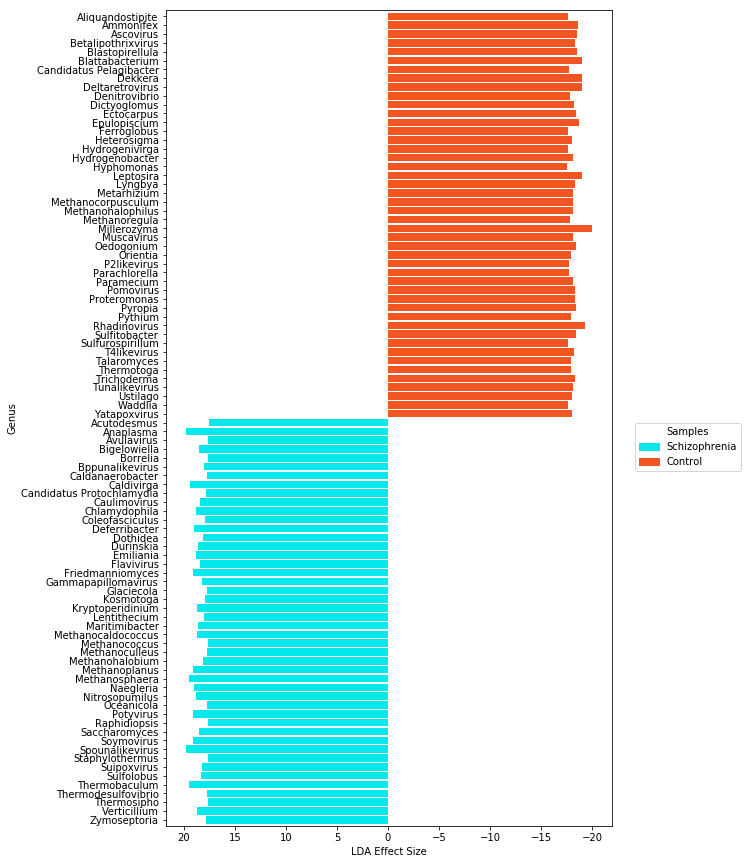

In [22]:
#Visualize the data
control_color = '#f05522'
schizo_color = '#05e9ed'

#Plot is usually drawn from bottom to up but we want it top-down in alphabetical order
#Another thing is to invert the x-axis so that >0 are displayed on the left side.
#color the >0 ones i.e. ones with positive LDA coefficients with schizo color and rest with control color
concat_df[::-1].plot(kind='barh', 
                     figsize=(8, 15), 
                     color=[np.flip(np.where(concat_df['class']>=0, schizo_color, control_color))], 
                     zorder=2, 
                     width=0.85).invert_xaxis()

#Label the x-axis
plt.xlabel("LDA Effect Size")

#set the legend
control_patch = mpatches.Patch(color=control_color, label='Control')
schizo_patch = mpatches.Patch(color=schizo_color, label='Schizophrenia')
plt.legend(handles=[schizo_patch,control_patch], bbox_to_anchor=(1.3,0.5), title='Samples')

#show the figure
plt.show()
